In [29]:
%matplotlib inline
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

Consider a cannon with a cannonball a distance $x$ from its left wall.

To the left of the cannonball, there is an ideal gas with pressure $p$ and volume $V$.

The cannonball has mass $m$ and cross-sectional area $A$, and is assumed to be cylindrical.

Since the cannon barrel also has cross sectional area $A$, the total volume is therefore:

$V = A x$

The total energy is:

$E = p V + \frac 1 2 m \dot{x}^2 $

Therefore, since the total energy is conserved, the pressure is 
    given by:
    
$ p(x, \dot{x}) = \frac{E_0 - \frac 1 2 \dot{x}^2}{A x}$

The total force on the cannonball is $p A$ (assuming no ambient
    atmosphere), so therefore the
    acceleration of the cannonball (by $F = m a$) is:
    
$ \ddot{x} = \frac{ E_0/m - \frac 1 2 \dot{x}^2}{x} $

The cannonball will achieve its maximum velocity when the force is zero, or when all of the energy of the gas has been transmitted to the cannonball. This happens when:

$ E_0 = \frac 1 2 m \dot{x}^2 $

or 

$ \dot{x} = \sqrt{ 2 \frac {E_0} m } $

In [64]:
x_initial = 0.1 #m
gun_diameter = 0.1 #m
A = np.pi*gun_diameter**2/4.0
sea_level_pressure = 101325.0 # pascals
sea_level_density = 1.22 # kg/m^3
shell_mass = 2.0 # kg
vacuum_exit_velocity = 400.0 # m/sec
energy_mass_ratio = 0.5*vacuum_exit_velocity**2 

In [68]:
def func(t, y):
    return np.array([y[1], 
        (energy_mass_ratio - 0.5*y[1]**2)/y[0] -\
        (sea_level_pressure + 0.5*sea_level_density*y[1]**2)*A/shell_mass])

In [69]:
integrator = ode(func)
integrator.set_integrator("dopri5")

In [70]:
integrator.set_initial_value(np.array([x_initial, 0.0]))
integrator.integrate(1.0)

array([ 256.69647226,  146.7027067 ])

In [71]:
integrator.integrate(2.0)

array([ 321.79738712,  -11.68581127])

In [95]:
t_max = 0.02
dt = 0.0001
T = np.linspace(0,t_max, int(t_max/dt)+1)

In [96]:
X = np.array([integrator.integrate(t)[0] for t in T])
V = np.array([integrator.integrate(t)[1] for t in T])

[0.0, 0.02, -20.0, 420.0]

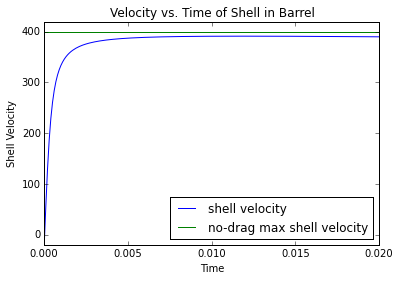

In [97]:
plt.plot(T,V, label="shell velocity")
plt.plot(T, T*0.0 + vacuum_exit_velocity, label="no-drag max shell velocity")
plt.xlabel("Time")
plt.ylabel("Shell Velocity")
plt.legend(loc=4)
plt.title("Velocity vs. Time of Shell in Barrel")
plt.axis([0.0, t_max, -0.05*vacuum_exit_velocity, 1.05 * vacuum_exit_velocity])

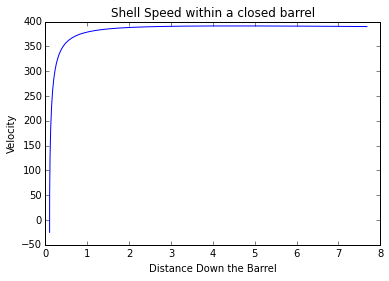

In [99]:
plt.plot(X, V)
plt.xlabel("Distance Down the Barrel")
plt.ylabel("Velocity")
plt.title("Shell Speed within a closed barrel")